In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif ,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 
import xgboost as xg
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix , ConfusionMatrixDisplay
import pickle
import warnings
warnings.filterwarnings('ignore')
print('modules loaded')

modules loaded


In [5]:
df = pd.read_csv("C:/Users/KIIT/OneDrive/Desktop/csv files/PS_20174392719_1491204439457_log.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [13]:
fraud_count =df['isFraud'].value_counts()
fraud_count

isFraud
0    6354407
1       8213
Name: count, dtype: int64

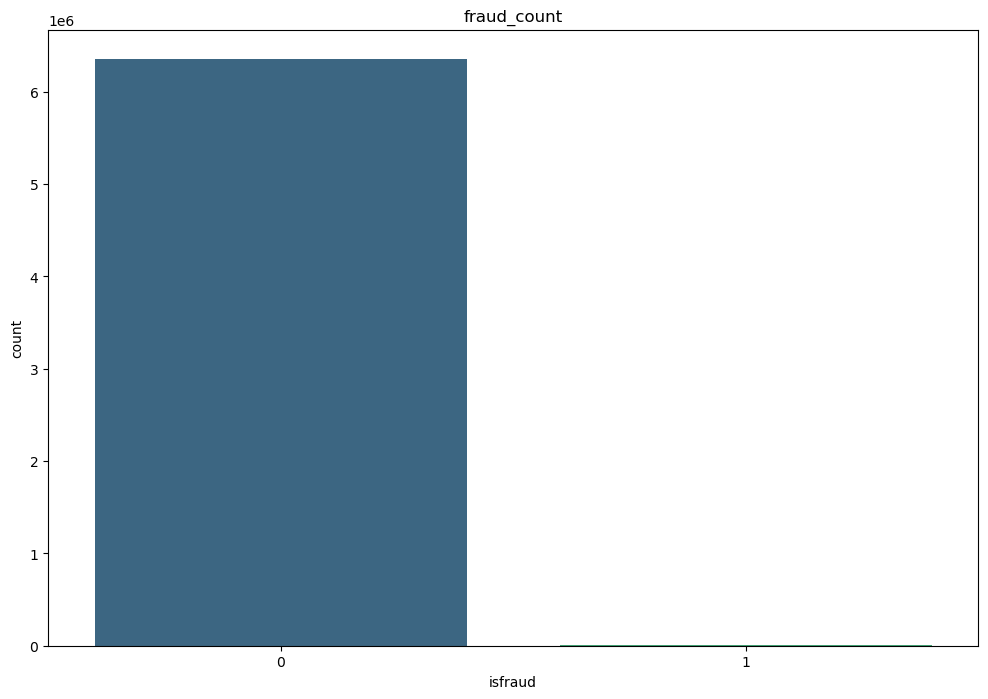

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x=fraud_count.index,y=fraud_count.values,palette='viridis')
plt.title('fraud_count')
plt.xlabel('isfraud')
plt.ylabel('count')
plt.show()

In [17]:
type_count =df['type'].value_counts()
type_count

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

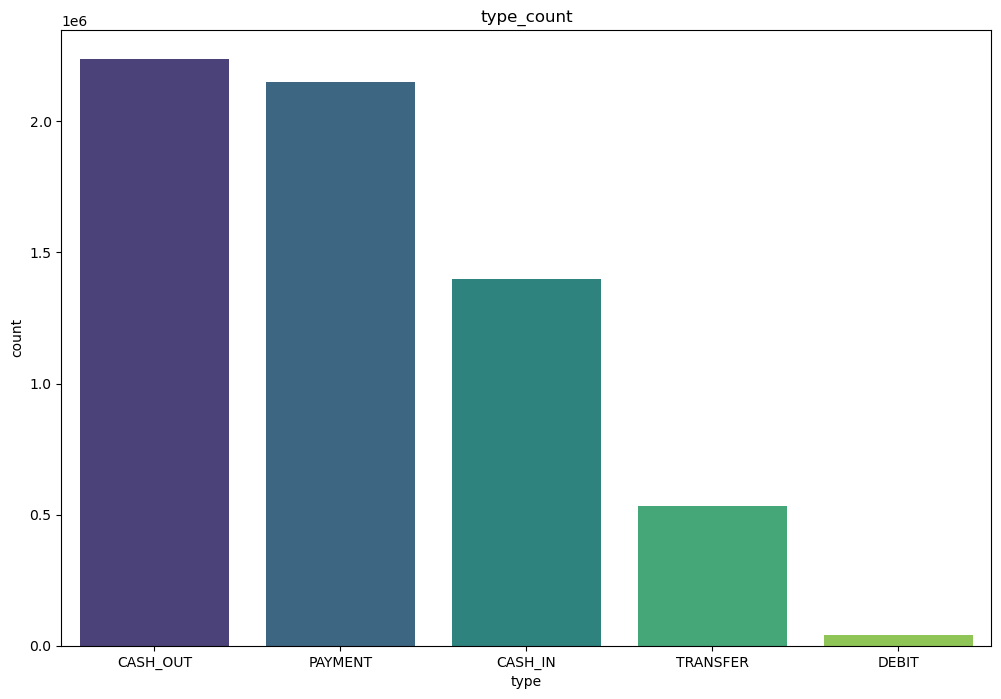

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=type_count.index,y=type_count.values,palette='viridis')
plt.title('type_count')
plt.xlabel('type')
plt.ylabel('count')
plt.show()

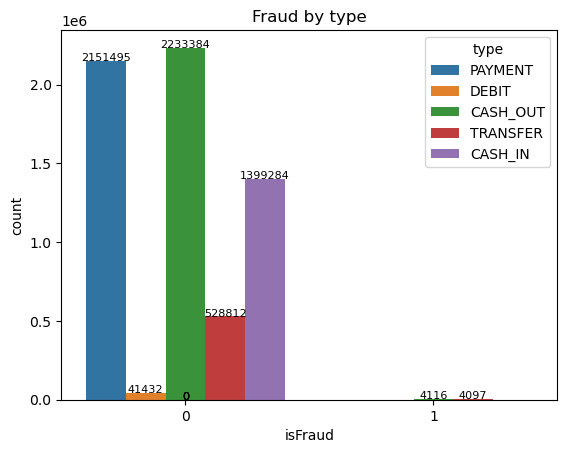

In [21]:
ax=sns.countplot(data=df, x="isFraud", hue="type")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha = 'center', fontsize=8, color='black', xytext=(0, 0), textcoords='offset points')
plt.title("Fraud by type")
plt.show()

In [23]:
df=df.drop(columns=['isFlaggedFraud','nameDest','nameOrig'])
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [25]:
df_0 = df[df['isFraud'] == 0] 
df_1 = df[df['isFraud'] == 1] 

df_0_sampled = df_0.sample(n=8213, random_state=42)
balanced_df = pd.concat([df_0_sampled, df_1])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,496,TRANSFER,766151.45,766151.45,0.00,0.00,0.00,1
1,365,TRANSFER,31315.51,31315.51,0.00,0.00,0.00,1
2,302,PAYMENT,19043.02,70067.00,51023.98,0.00,0.00,0
3,383,PAYMENT,11162.03,102921.00,91758.97,0.00,0.00,0
4,354,CASH_OUT,268851.80,220431.00,0.00,1641753.59,1910605.40,0
...,...,...,...,...,...,...,...,...
16421,273,TRANSFER,159106.12,159106.12,0.00,0.00,0.00,1
16422,336,TRANSFER,170038.31,170038.31,0.00,0.00,0.00,1
16423,18,CASH_OUT,8369.07,23265.00,14895.93,70063.42,78432.50,0
16424,249,CASH_IN,262120.50,8127067.18,8389187.68,407941.21,145820.71,0


In [27]:
columns_onehot=['type']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(balanced_df[columns_onehot])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(columns_onehot))
balanced_df = pd.concat([balanced_df.reset_index(drop=True), one_hot_df.reset_index(drop=True)], axis=1)
balanced_df = balanced_df.drop(columns_onehot, axis=1)

In [29]:
balanced_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,496,766151.45,766151.45,0.00,0.00,0.00,1,0.0,0.0,0.0,0.0,1.0
1,365,31315.51,31315.51,0.00,0.00,0.00,1,0.0,0.0,0.0,0.0,1.0
2,302,19043.02,70067.00,51023.98,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
3,383,11162.03,102921.00,91758.97,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
4,354,268851.80,220431.00,0.00,1641753.59,1910605.40,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16421,273,159106.12,159106.12,0.00,0.00,0.00,1,0.0,0.0,0.0,0.0,1.0
16422,336,170038.31,170038.31,0.00,0.00,0.00,1,0.0,0.0,0.0,0.0,1.0
16423,18,8369.07,23265.00,14895.93,70063.42,78432.50,0,0.0,1.0,0.0,0.0,0.0
16424,249,262120.50,8127067.18,8389187.68,407941.21,145820.71,0,1.0,0.0,0.0,0.0,0.0


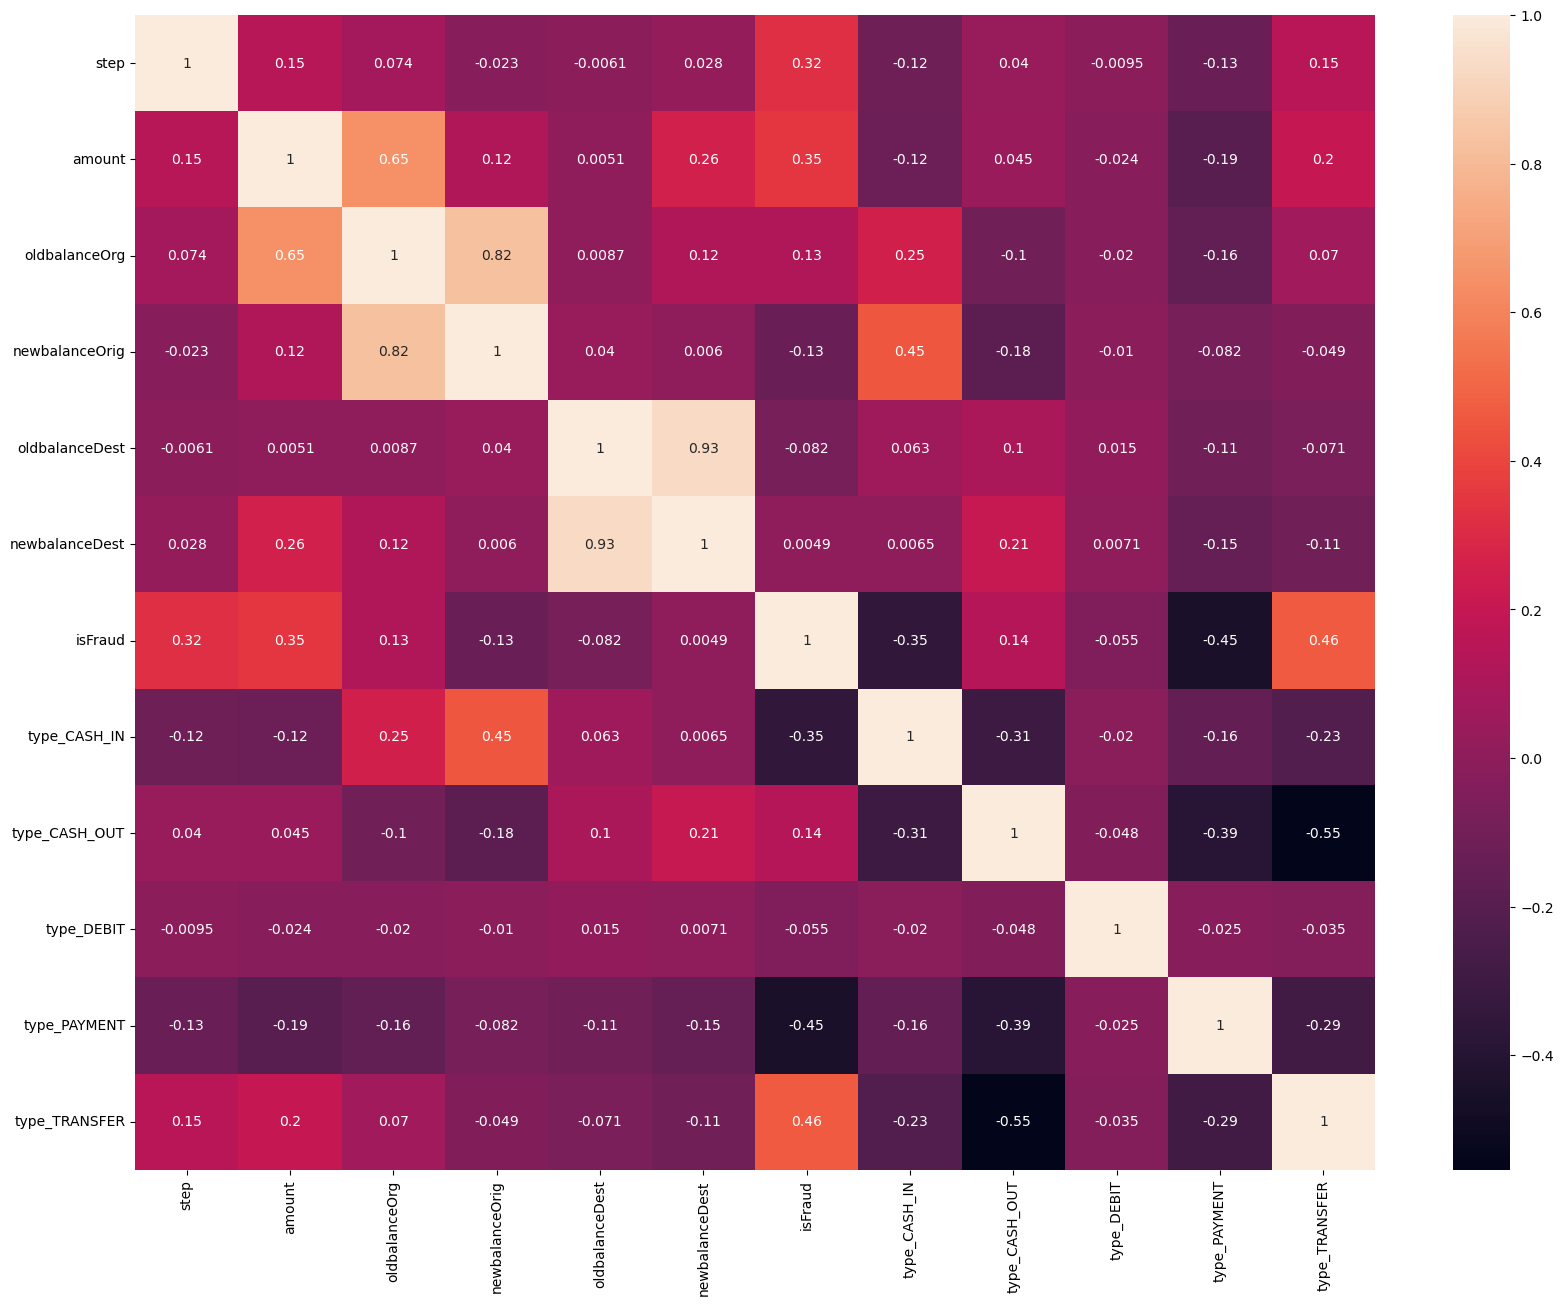

In [31]:
plt.figure(figsize=(20 ,15))
sns.heatmap(balanced_df.corr(), annot=True)
plt.show()

In [33]:
x=balanced_df.drop('isFraud',axis=1)
y=balanced_df[['isFraud']]

In [35]:
scaler=MinMaxScaler()

In [121]:
model = LogisticRegression()

rfe = RFE(estimator=model, n_features_to_select=6)
x_new = rfe.fit_transform(x, y)

selected_features = x.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['step', 'oldbalanceOrg', 'newbalanceOrig', 'type_CASH_OUT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [123]:
x_new=scaler.fit_transform(x_new)

In [125]:
X_train_w,X_test_w,y_train_w,y_test_w=train_test_split(x_new,y,test_size=0.2,random_state=42,stratify=y)

In [127]:
lR=LogisticRegression(C=10, penalty= 'l2', solver= 'lbfgs')
lR.fit(X_train_w,y_train_w)

LogisticRegression(C=10)

In [129]:
lR.score(X_train_w,y_train_w)

0.85220700152207

In [131]:
ypred_lR=lR.predict(X_test_w)

In [133]:
print(accuracy_score(y_test_w,ypred_lR))

0.8514911746804625


[[1329  314]
 [ 174 1469]]


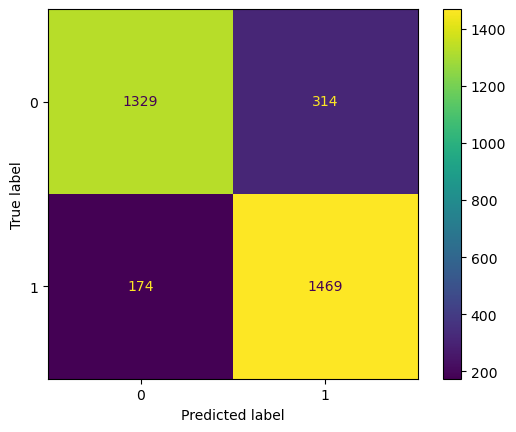

In [135]:
ConfusionMatrixDisplay.from_predictions(y_test_w, ypred_lR)
print(confusion_matrix(y_test_w, ypred_lR))

In [137]:
print(classification_report(y_test_w,ypred_lR))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1643
           1       0.82      0.89      0.86      1643

    accuracy                           0.85      3286
   macro avg       0.85      0.85      0.85      3286
weighted avg       0.85      0.85      0.85      3286



In [139]:
Dt=DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split= 5)
Dt.fit(X_train_w,y_train_w)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5)

In [141]:
Dt.score(X_train_w,y_train_w)

0.973820395738204

In [143]:
ypred_Dt=Dt.predict(X_test_w)

In [145]:
print(accuracy_score(y_test_w,ypred_Dt))

0.9430919050517347


[[1547   96]
 [  91 1552]]


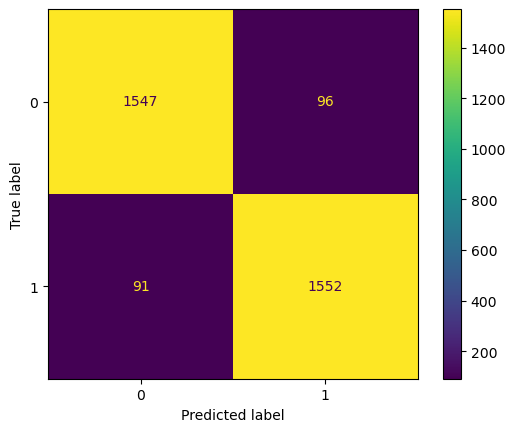

In [147]:
ConfusionMatrixDisplay.from_predictions(y_test_w, ypred_Dt)
print(confusion_matrix(y_test_w, ypred_Dt))

In [149]:
print(classification_report(y_test_w,ypred_Dt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1643
           1       0.94      0.94      0.94      1643

    accuracy                           0.94      3286
   macro avg       0.94      0.94      0.94      3286
weighted avg       0.94      0.94      0.94      3286



In [151]:
Rf=RandomForestClassifier()
Rf.fit(X_train_w,y_train_w)

RandomForestClassifier()

In [153]:
Rf.score(X_train_w,y_train_w)

0.9983257229832573

In [155]:
ypred_Rf=Rf.predict(X_test_w)
print(accuracy_score(y_test_w,ypred_Rf))

0.9461351186853317


[[1542  101]
 [  76 1567]]


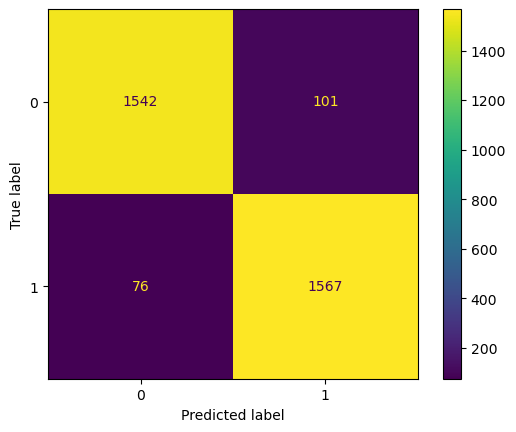

In [157]:
ConfusionMatrixDisplay.from_predictions(y_test_w, ypred_Rf)
print(confusion_matrix(y_test_w, ypred_Rf))

In [159]:
print(classification_report(y_test_w,ypred_Rf))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1643
           1       0.94      0.95      0.95      1643

    accuracy                           0.95      3286
   macro avg       0.95      0.95      0.95      3286
weighted avg       0.95      0.95      0.95      3286



In [161]:
Gb=GradientBoostingClassifier(learning_rate= 0.1, max_depth=7, n_estimators= 150)
Gb.fit(X_train_w,y_train_w)

GradientBoostingClassifier(max_depth=7, n_estimators=150)

In [76]:
Gb.score(X_train_w,y_train_w)

0.8900304414003044

In [163]:
ypred_Gb=Gb.predict(X_test_w)

In [165]:
print(accuracy_score(y_test_w,ypred_Gb))

0.9637857577601948


[[1567   76]
 [  43 1600]]


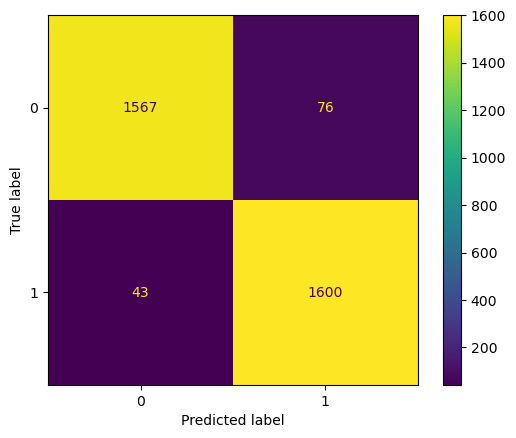

In [167]:
ConfusionMatrixDisplay.from_predictions(y_test_w, ypred_Gb)
print(confusion_matrix(y_test_w, ypred_Gb))

In [169]:
print(classification_report(y_test_w,ypred_Gb))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1643
           1       0.95      0.97      0.96      1643

    accuracy                           0.96      3286
   macro avg       0.96      0.96      0.96      3286
weighted avg       0.96      0.96      0.96      3286



In [171]:
XGb=xg.XGBClassifier(learning_rate= 0.2, max_depth=7, n_estimators= 150)
XGb.fit(X_train_w,y_train_w)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

In [173]:
XGb.score(X_train_w,y_train_w)

0.9791476407914764

In [175]:
ypred_Xgb=XGb.predict(X_test_w)

In [177]:
print(accuracy_score(y_test_w,ypred_Xgb))

0.960438222763238


[[1569   74]
 [  56 1587]]


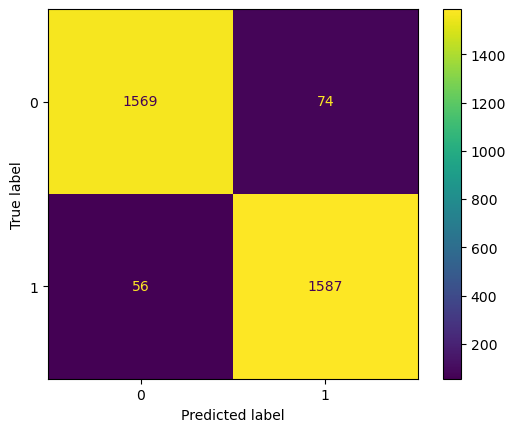

In [179]:
ConfusionMatrixDisplay.from_predictions(y_test_w, ypred_Xgb)
print(confusion_matrix(y_test_w, ypred_Xgb))

In [181]:
print(classification_report(y_test_w,ypred_Xgb))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1643
           1       0.96      0.97      0.96      1643

    accuracy                           0.96      3286
   macro avg       0.96      0.96      0.96      3286
weighted avg       0.96      0.96      0.96      3286



In [183]:
models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": xg.XGBClassifier(),
    "Decisiontree":DecisionTreeClassifier()
}

In [185]:
param_grids = {
    "RandomForest": {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
   "LogisticRegression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'saga']
   },
    "GradientBoosting": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "XGBoost": {'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "Decisiontree":{
        'criterion': ['gini', 'entropy'],  
        'max_depth': [5, 10, 15],  
        'min_samples_split': [2, 5, 10]
    }
}

In [187]:
best_models = {}
for model_name in models:
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=models[model_name],
        param_grid=param_grids[model_name],
        scoring='accuracy',
        cv=5,  
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train_w, y_train_w)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best CV accuracy for {model_name}: {grid_search.best_score_:.4f}")

Performing Grid Search for RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best CV accuracy for RandomForest: 0.9485
Performing Grid Search for LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best CV accuracy for LogisticRegression: 0.8454
Performing Grid Search for GradientBoosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for GradientBoosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best CV accuracy for GradientBoosting: 0.9572
Performing Grid Search for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
Best CV accuracy for XGBoost: 0.9551
Performing Grid Search for Decisiont

In [189]:
print("\nTesting the best models on the full dataset...")
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_w)
    accuracy = accuracy_score(y_test_w, y_pred)
    print(f"{model_name} accuracy: {accuracy:.4f}")


Testing the best models on the full dataset...
RandomForest accuracy: 0.9513
LogisticRegression accuracy: 0.8515
GradientBoosting accuracy: 0.9641
XGBoost accuracy: 0.9598
Decisiontree accuracy: 0.9470
